## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [5]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [6]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [7]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [8]:
proportion = df.query('converted == 1')['user_id'].nunique() / df.user_id.nunique()
proportion

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [9]:
df.user_id.count() - df.query('group == "treatment" and landing_page == "new_page" or group == "control" and landing_page == "old_page"')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [10]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = df.query('group == "treatment" and landing_page == "new_page" or group == "control" and landing_page == "old_page"')

In [12]:
df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [13]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

###### therefore, the correct rows in the dataset is removed.

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2['is_duplicated'] = df2.duplicated(['user_id'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df2['is_duplicated'].value_counts()

False    290584
True          1
Name: is_duplicated, dtype: int64


hence, there is one row which is duplicated.


c. What is the row information for the repeat **user_id**? 

In [17]:
duplicate_row = df2.loc[df2['is_duplicated'] == True]
duplicate_row

,user_id,timestamp,group,landing_page,converted,is_duplicated
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
df2 = df2[df2['is_duplicated'] == False]
df2.head()

,user_id,timestamp,group,landing_page,converted,is_duplicated
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False


That Duplicate row is now removed.

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
df2.query('landing_page == "new_page"')['user_id'].count() / df2['user_id'].count()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> * As per my results, the control group (user who got the old page) have a higher transformation rate than the treatment gathering (clients with the new page), in any case, the contrast between the extents doesn't appear to be excessively huge. The likelihood that a user gets the new is generally adjusted (near half), so the absence of chances or the imbalanced users group can not be the reason for the controversions

> * User converted in both control and treatment group are almost close and probability of an individual converting regardless of the page they receive. therefor, there is no evidence that they new page leads to more contriversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**According to my null hypothesis the old page is almost same as the new page and have more or the same number of visitors compared to the newer page. 
My option would be that the new page is better and has more guests.**

$H_0$ : $p_{old}$ - $p_{new}$ &gt;=  0 $$$$ $H_1$ : $p_{old}$ - $p_{new}$ &lt;  0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [23]:
p_new = df2[df2['converted'] == 1].user_id.nunique()/df2.user_id.nunique()
print('p_new convert rate: ', p_new)

p_new convert rate:  0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [24]:
p_old = df2[df2['converted'] == 1].user_id.nunique()/df2.user_id.nunique()

print('p_old convert rate: ', p_old)

p_old convert rate:  0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [25]:
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
print('n_new:',n_new)

n_new: 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [26]:
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
print('n_old:',n_old)

n_old: 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
new_page_converted
print('new_page_converted:', np.unique(new_page_converted))

new_page_converted: [0 1]


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.choice([0,1],n_new, p=(p_old,1-p_old))
old_page_converted
print('old_page_converted:',np.unique(old_page_converted))

old_page_converted: [0 1]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
new_mean = new_page_converted.mean()
old_mean = old_page_converted.mean()
o_diffs = new_mean - old_mean
print(o_diffs)

0.000178927809511


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [33]:
p_diffs = []
size = df.shape[0]
for _ in range(10000):
    sam= df2.sample(size, replace = True)
    new_page_converted = np.random.choice([0,1], n_new, p = [p_new,1-p_new])
    old_page_converted = np.random.choice([0,1], n_old, p = [p_old,1- p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

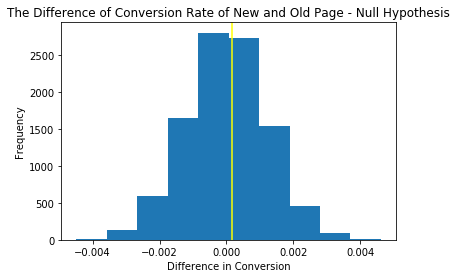

In [34]:
plt.hist(p_diffs)
plt.axvline(x=o_diffs,color ='yellow')
plt.title('The Difference of Conversion Rate of New and Old Page - Null Hypothesis')
plt.xlabel('Difference in Conversion')
plt.ylabel('Frequency')
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
cnvrt_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()

cnvrt_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

In [37]:
print('convert_new:',cnvrt_new)
print('convert_old:',cnvrt_old)

convert_new: 17264
convert_old: 17489


In [38]:
actual_cvt_new = float(cnvrt_new)/ float(n_new) 
actual_cvt_old = float(cnvrt_old)/ float(n_old)

In [39]:
obs_diff = actual_cvt_new - actual_cvt_old
obs_diff

-0.0015782389853555567

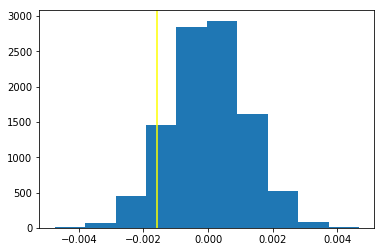

In [40]:
null_vals = np.random.normal(0, np.std(p_diffs), np.array(p_diffs).size)
plt.hist(null_vals)
plt.axvline(x=obs_diff,color ='yellow');

**j's Solution**

In [42]:
val = (null_vals > obs_diff).mean()

In [43]:
val

0.91080000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value calculated in part-j is the p-value, which predicts weather can reject the null hypothesis or not.**

**The p-value is very high and we calculated that more than half of our sample values lies above the observed difference.**

**Histogram shows the new page does not do better hence null hypothesis rejected.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [44]:
import statsmodels.api as sm

cnvrt_old = df2.query('landing_page == "old_page" and converted == 1')['user_id'].nunique()
cnvrt_new = df2.query('landing_page == "new_page" and converted == 1')['user_id'].nunique()
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

print('Conversion rate for old page: ', cnvrt_old)
print('Conversion rate for new page: ', cnvrt_new)
print('Number of rows (old page): ', n_old)
print('Number of rows (new page): ', n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Conversion rate for old page:  17489
Conversion rate for new page:  17264
Number of rows (old page):  145274
Number of rows (new page):  145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [46]:
z_score, p_value = sm.stats.proportions_ztest([cnvrt_new, cnvrt_old], [n_new, n_old], alternative='larger')
print('z-score: ', z_score)
print('p-value: ', p_value)

z-score:  -1.31092419842
p-value:  0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

z-score = 1.31092419842
p-value = 0.905058312759

**Difference in the z-score and p-value is huge so that we can reject null hypothesis and results are same which we got in the in previous question(j) where p-value were 0.91080000000000005**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**As we have 2 different outcomes (converted and not converted), we can use the logistic regression model. As the target variable is categorical.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [47]:
#New Column "Intercept"
df2['intercept'] = 1

#New dummy variable column for which page each user received
df2= df2.join(pd.get_dummies(df2['landing_page']))

#ab_page column, 1 =treaatment and 0= control
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']

In [48]:
df2.head()

,user_id,timestamp,group,landing_page,converted,is_duplicated,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [55]:
#logit regression model 

from scipy.stats import norm
from scipy import stats
log = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

## For running this we need scipy ver0.19.0 because it may be removed or renamed. but I imported stats from scipy library then defined lambda So, it worked.

In [56]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
result = log.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 06 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        19:08:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value in the model in Part-III is unique from the other p-value.**

**I determined during Part-II due to the two distinct methodologies of the calculation. The p-value in Part-II recommends how likely are our data accepting a null hypothesis.**

**The p-value is very high in Part-II proposing that we fail to reject the null hypothesis.**

**The p-value associated with the ab_page is 0.19**

**There is no much difference between the treatment and control groups and alternative hypothesis.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It would be a smart thought to include the timestamp spent on-page. The additional time the spent on a page the bound to become accustomed to it and get engaged. which may make user habitual to the page.**

**A disadvantage can be adding additional terms into the regression model is that it will make it more complex which can complicate model outp.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [59]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


For unique countries in dataset

In [60]:
np.unique(countries_df['country'])

array(['CA', 'UK', 'US'], dtype=object)

In [61]:
df3 = df2.merge(countries_df, on ='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,is_duplicated,intercept,new_page,old_page,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0,1,0,US


In [64]:
#dropping the 'CA'
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])
df3= df3.drop(['CA'], axis=1)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [69]:
df3.head(4)

,user_id,timestamp,group,landing_page,converted,is_duplicated,intercept,new_page,old_page,ab_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,0,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,0,1,US,0,1


In [70]:
#Logit Regression 
logit_mod = sm.Logit(df3['converted'], df3[['intercept','ab_page', 'US', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 06 Jun 2020   Pseudo R-squ.:               2.323e-05
Time:                        19:48:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

In [72]:
# To find which value is insignificant for each variables
np.exp(result.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0